In [88]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [89]:
def step_key(file_name):
    return int(file_name.split('_')[1])

## Getting file names

In [91]:
N=1000
F=0.001
loc="/data/kabir/output/SOC_model/data_f"+str(F)+"N"+str(N)+"/" #180519_
files=os.listdir(loc)
files.remove("avalanche_sizes.pkl")
for file in files:
    if "time" in file:
        time_file=file
#print(time_file)
files.remove(time_file)
files=sorted(files,key=step_key)
print(files)

['step_0_data.pkl', 'step_100_data.pkl', 'step_200_data.pkl', 'step_300_data.pkl', 'step_400_data.pkl', 'step_500_data.pkl', 'step_600_data.pkl', 'step_700_data.pkl', 'step_800_data.pkl', 'step_900_data.pkl', 'step_1000_data.pkl', 'step_1100_data.pkl', 'step_1200_data.pkl', 'step_1300_data.pkl', 'step_1400_data.pkl', 'step_1500_data.pkl', 'step_1600_data.pkl', 'step_1700_data.pkl', 'step_1800_data.pkl', 'step_1900_data.pkl', 'step_2000_data.pkl', 'step_2100_data.pkl', 'step_2200_data.pkl', 'step_2300_data.pkl', 'step_2400_data.pkl', 'step_2500_data.pkl', 'step_2600_data.pkl', 'step_2700_data.pkl', 'step_2800_data.pkl', 'step_2900_data.pkl', 'step_3000_data.pkl', 'step_3100_data.pkl', 'step_3200_data.pkl', 'step_3300_data.pkl', 'step_3400_data.pkl', 'step_3500_data.pkl', 'step_3600_data.pkl', 'step_3700_data.pkl', 'step_3800_data.pkl', 'step_3900_data.pkl', 'step_4000_data.pkl', 'step_4100_data.pkl', 'step_4200_data.pkl', 'step_4300_data.pkl', 'step_4400_data.pkl', 'step_4500_data.pkl',

## Loading steps data from files

In [96]:
steps=[]
data=[]
for file in files:
    path=loc+file
    #print(file)
    with open(path,'rb') as pickle_file:
        u = pkl._Unpickler(pickle_file)
        u.encoding = 'latin1'
        data.append(u.load()['dist'])
    steps.append(step_key(file))
    
with open(loc+'avalanche_sizes.pkl','rb') as pickle_file:
        u = pkl._Unpickler(pickle_file)
        u.encoding = 'latin1'
        avalanche_sizes=u.load()

In [34]:
data[0]['A'].dtype

dtype('bool')

## Plotting final degree distribution`

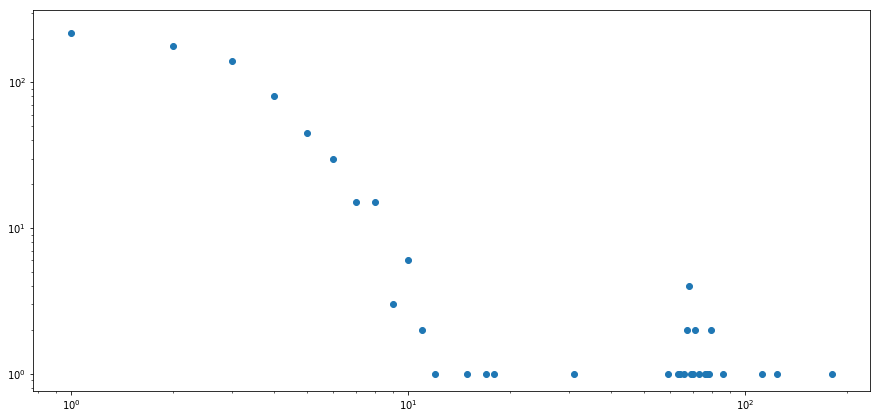

In [106]:
%matplotlib inline
step=42 ###last step is -1, first step is 0
fig = plt.figure(figsize=(15, 7))
plt.plot(data[step][0],data[step][1],'o')

plt.yscale('log')
plt.xscale('log')

In [36]:
data[0]['dist']

[array([0., 1., 2., 3., 4., 5., 6.]), array([0, 0, 1, 2, 2, 2, 3])]

In [35]:
np.all(data[0]['A']==data[1]['A'])

False

In [13]:
np.all(np.array(['save_distribution'][0])==np.array(p['save_distribution'][-1]))

/home/kabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

In [23]:
np.dot(a[1].flat,a[0].flat)/5000

3.93

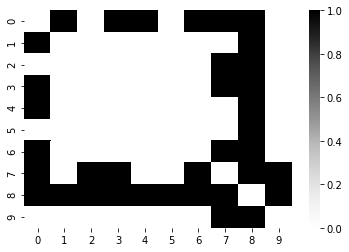

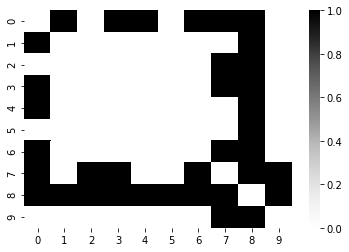

In [37]:
step=50
A=data[step]['A']
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()

A=data[step+1]['A']
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()

In [18]:
len(p['save_As'])

10

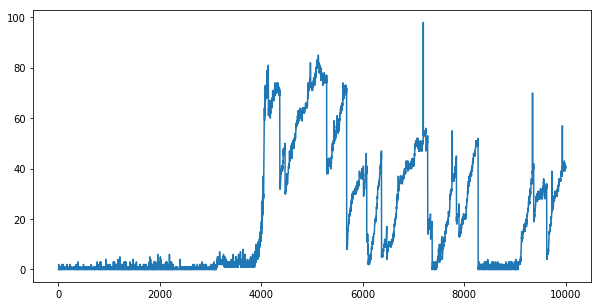

In [97]:
plt.figure(figsize=(10,5))
plt.plot(avalanche_sizes)

In [ ]:
clear all

In [81]:
I=np.identity(5)
I[2,2]=0
b=np.ones(5)
np.matmul(I,b>0)

array([1., 1., 0., 1., 1.])

In [82]:
b>0

array([ True,  True,  True,  True,  True])